# 중간프로젝트보완_202055115 김예진

데이터 출처(국민체력실태조사데이터) : https://www.sports.re.kr/front/board/bs/boardList.do?menu_seq=598&board_seq=48 

In [1]:
# 아래와 같이 필요한 라이브러리를 임포트 합니다.
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리 숫자까지 표시
%precision 3

!pip install IPython 
from IPython.display import Image 

#수정(Add)
#시각화 할 때 한글 깨지는 것을 방지하기 위함 
plt.rcParams['font.family'] = 'NanumGothic'

# 상황 1 

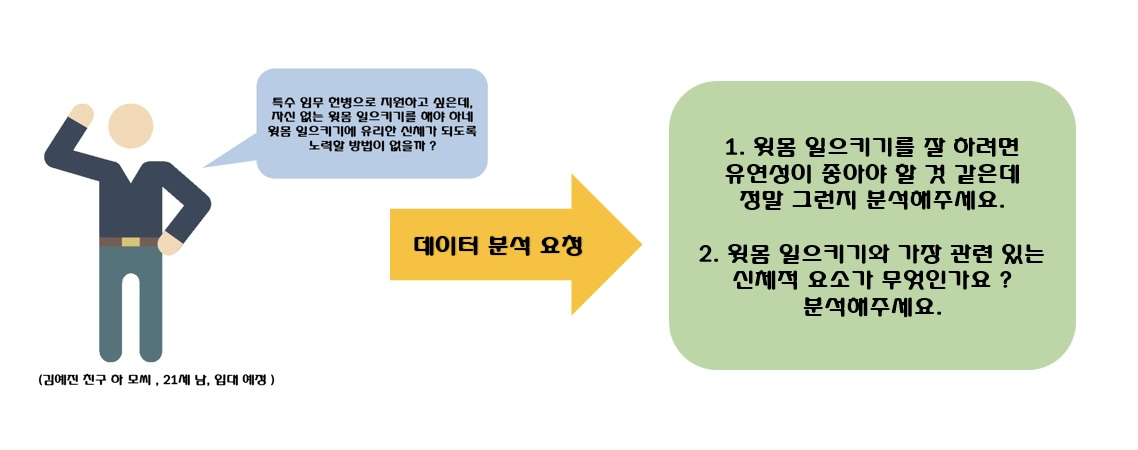

In [2]:
Image("그림1.jpg")

## .........................................................................
## TO DO LIST
## 업무 1. 윗몸 일으키기 - 유연성의 상관관계 파악

## 업무 2.윗몸 일으키기와 상관관계가 가장 깊은 신체조건
## .........................................................................

## 업무 1. 윗몸 일으키기 - 유연성의 상관관계 파악

### 1.A 데이터 불러오기 및 살펴보기 

In [3]:
data = pd.read_csv('2017국민체력실태조사_ 통합 raw data.csv',encoding='cp949')
data.head()

,Unnamed: 0,Unnamed: 1,지역,연령(만),성별,성명,신장,체중,BMI,체지방률,허리둘레,윗몸일으키기,악력(D),악력(ND),제자리멀리뛰기,20m 왕복오래달리기,좌전굴,10m 왕복달리기,연령집단
0,1,1,1,19,1,NaN,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,1
1,2,1,1,19,1,NaN,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,1
2,3,1,1,19,1,NaN,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,1
3,4,1,1,19,1,NaN,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,1
4,5,1,1,19,1,NaN,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4292 non-null   int64  
 1   Unnamed: 1   4292 non-null   int64  
 2   지역           4292 non-null   int64  
 3   연령(만)        4292 non-null   int64  
 4   성별           4292 non-null   int64  
 5   성명           0 non-null      float64
 6   신장           4292 non-null   float64
 7   체중           4292 non-null   float64
 8   BMI          4292 non-null   float64
 9   체지방률         4292 non-null   float64
 10  허리둘레         4292 non-null   float64
 11  윗몸일으키기       4292 non-null   int64  
 12  악력(D)        4292 non-null   float64
 13  악력(ND)       4292 non-null   float64
 14  제자리멀리뛰기      4292 non-null   int64  
 15  20m 왕복오래달리기  4292 non-null   int64  
 16  좌전굴          4292 non-null   float64
 17  10m 왕복달리기    4292 non-null   float64
 18  연령집단         4292 non-null   int64  
dtypes: flo

data column 정보 


성별 1 : 남 / 2: 여 


연령집단 (19세부터 64세까지 9단계로 나누어져있다) 

### 1.B 데이터 전처리 

#### 결측치 확인 및 보정 

In [5]:
data.isna().sum()
data1 = data.drop(['성명','지역','Unnamed: 0','Unnamed: 1'],axis = 1) #결측치가 많은 열이나 필요없는 열 제거 
data1.columns = ['age','sex','height','weight','BMI','body_fat_cal','waist','sit_up','grip_D','grip_ND','jump','long_dis_run_20','flexion','long_dis_run_10','age_group']
condlist = [(data1.age<20),
            (data1.age >= 20) &(data1.age< 30),
           (data1.age >= 30) & (data1.age< 40),
           (data1.age >= 40) & (data1.age< 50),
           (data1.age >= 50) & (data1.age< 60),
           (data1.age >= 60) ]
choicelist = ['10대','20대','30대','40대','50대','60대']
data1['age_group'] = np.select(condlist, choicelist, default = 'NaN')
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대


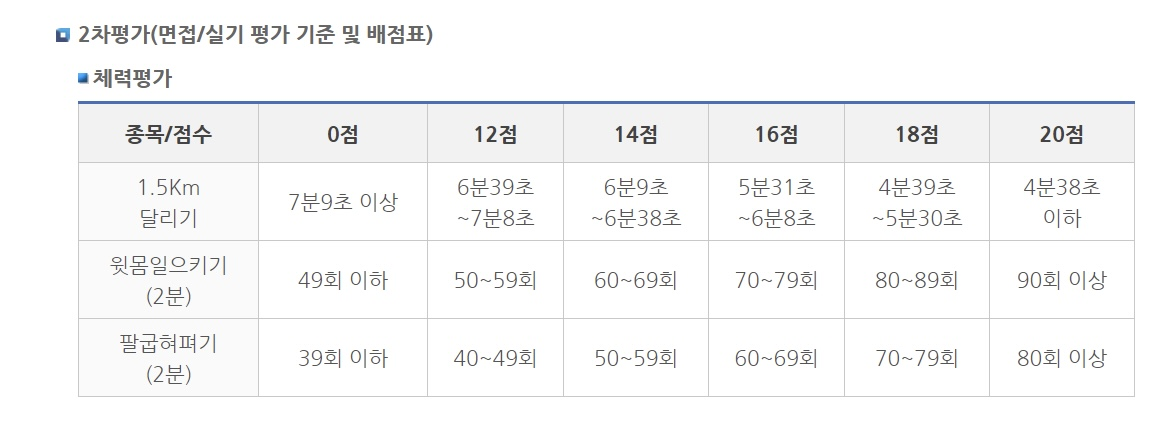

In [6]:
Image("특수임무헌병 체력 검정 기준표.jpg") 

=> 실제 특수 임무 헌병 체력 검정표이고, 이를 참고하여 윗몸일으키기 점수를 하위권과 상위권으로 나눴다. (의뢰인에게 상위권에 속해야 함을 권고하기 위해)

# 수정 1 

# 수정 전 : 특수 임무 헌병 체력 검정표를 참고하여 윗몸일으키기 개수의 기준을 정하였다. 

# 수정 이유 : 위 표에서는 윗몸일으키기를 2분 기준으로 측정하고, 국민체력실태조사에서는 윗몸일으키기를 1분 기준으로 측정하였다는 점에서 표의 2분의 1만큼의 개수로  기준을 정하였는데  이 기준이 모호할 수 있다는 생각을 하였다.

# 수정 방안: 국민체력실태조사에서 20대 남성의 데이터 중 75%이상을 상위권 기준 25%이하를 하위권기준으로 그 외에는 중위권으로 설정하는 것으로 수정함.

# Before

In [7]:
condlist1 = [(data1.sit_up< 40),
             (data1.sit_up >= 40) ]
choicelist1 = ['하위권','상위권']
data1['sit_up_group'] = np.select(condlist1, choicelist1, default = 'NaN')
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,상위권
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,상위권
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대,하위권
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대,하위권
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대,하위권
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대,하위권


In [8]:
#20대 남자 데이터 추출 (군입대라는 상황 고려)
data_twenty = data1[data1.age_group == '20대']
data_twenty_M = data_twenty[data_twenty.sex == 1 ]
data_twenty_M

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group
16,20,1,166.0,54.5,19.8,13.9,73.6,61,40.5,36.2,254,53,17.3,9.13,20대,상위권
17,20,1,182.5,83.9,25.2,14.6,82.0,41,49.3,43.0,245,51,2.0,9.97,20대,상위권
18,20,1,177.4,81.8,26.0,28.7,92.7,34,36.9,40.2,191,38,13.4,11.60,20대,하위권
19,20,1,163.1,70.0,26.3,21.6,86.8,37,47.0,52.7,240,41,9.8,9.96,20대,하위권
20,20,1,175.2,69.2,22.5,20.1,81.3,55,44.4,40.3,243,49,9.4,10.66,20대,상위권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,26,1,178.0,78.0,24.6,8.9,80.7,50,55.0,54.5,263,70,6.9,10.80,20대,상위권
4154,26,1,175.8,69.1,22.4,20.1,80.1,54,47.7,40.5,210,76,6.1,9.80,20대,상위권
4160,28,1,171.7,63.8,21.6,19.8,81.3,54,46.4,35.3,242,65,25.9,9.60,20대,상위권
4161,28,1,170.4,70.3,24.2,26.4,83.7,38,46.1,33.6,212,30,13.8,10.45,20대,하위권


# After

In [9]:
data_twenty = data1[data1.age_group == '20대']
data_twenty_M = data_twenty[data_twenty.sex == 1 ]
data_twenty_M['sit_up'].describe()

count    467.000000
mean      46.837259
std       11.760634
min        1.000000
25%       40.000000
50%       48.000000
75%       55.000000
max       74.000000
Name: sit_up, dtype: float64

In [10]:
data1['sit_up_group'] = ['상위권' if s >= 55 else '하위권' if s< 40 else '중위권' for s in data1['sit_up']]

### 1.C 데이터 시각화 
### 윗몸 일으키기 - 유연성의 상관관계 파악

# 수정 2 : 유연성이 높을수록 윗몸일으키기를 잘 하는가 ? 를 알아보려면 
#            유연성이 x축 윗몸일으키기가 y축에 오는 것이 적절한 것 같아서 
#            수정함 

# Before

[0.41393509496227554, 9.308769061090712e-21]
[0.42688697243220586, 4.1689841941138205e-22]


C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


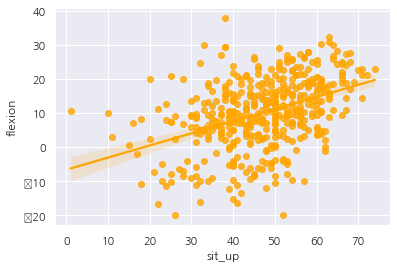

In [11]:
import scipy.stats as stats 
sns.regplot(data =data_twenty_M, x = 'sit_up', y = 'flexion',color = 'orange')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.flexion)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up,data_twenty_M.flexion)
print([R2, p2])

# After

[0.41393509496227554, 9.308769061090712e-21]
[0.42688697243220586, 4.1689841941138205e-22]


C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


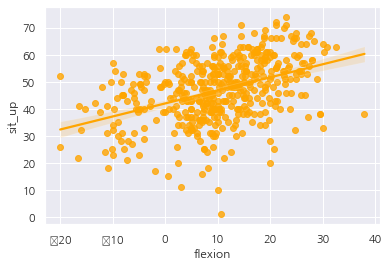

In [12]:
import scipy.stats as stats 
sns.regplot(data =data_twenty_M, x = 'flexion', y = 'sit_up',color = 'orange')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.flexion)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up,data_twenty_M.flexion)
print([R2, p2])

유연성이 높을수록 윗몸일으키기 갯수가 늘어나는 양의 상관관계를 띄고있고, 
p값 또한 매우 작으므로 유의한 값임을 알 수 있다. 

t - test 결과 

In [13]:
#20대 남성 그룹에서 윗몸일으키기와 유연성의 관계가 유의한가
[t_stat, p] = stats.ttest_ind(data_twenty_M[data_twenty_M.sit_up_group == '상위권'].flexion,
                              data_twenty_M[data_twenty_M.sit_up_group == '하위권'].flexion)
[t_stat,p]

[5.076850224440151, 5.561436252166389e-07]

### t-test는 그룹간 평균의 비교로
###  윗몸일으키기 점수 상하위권 그룹 간 유연성의 차이가 유의한지 검정했을 때,
### 양쪽 그룹의 차가 많이나며 p값이 매우 작으므로 유의한 값이다.

## solution 1  
## 윗몸일으키기와 유연성간의 상관관계가 높으니까 윗몸일으키기 잘 하고 싶으면 
##  유연성을 길러보세요 ! 

# -----------------------------------------------------------------------------------------------------

## 업무 2.윗몸 일으키기와 상관관계가 가장 깊은 신체조건

### 2.A 데이터 불러오기 및 살펴보기 (위와 동일한 방식으로)

### 2.B 데이터 전처리 (위와 동일한 방식으로)

# 수정 3 윗몸 일으키기와 상관관계가 가장 깊은 신체조건을 알아보기 위해 corrwith를 사용하였는데 heatmap으로 봐도 좋을 것 같아서 추가하였습니다. 

# Before

In [14]:
data_twenty_M.corrwith(data_twenty_M.sit_up)

age               -0.122277
sex                     NaN
height            -0.026831
weight            -0.116366
BMI               -0.117919
body_fat_cal      -0.393446
waist             -0.221550
sit_up             1.000000
grip_D             0.305359
grip_ND            0.311425
jump               0.613012
long_dis_run_20    0.535179
flexion            0.413935
long_dis_run_10   -0.564445
dtype: float64

In [15]:
data_twenty_M.corrwith(data_twenty_M.sit_up,method = 'spearman')

age               -0.126991
sex                     NaN
height            -0.034339
weight            -0.051351
BMI               -0.047586
body_fat_cal      -0.398366
waist             -0.167874
sit_up             1.000000
grip_D             0.297532
grip_ND            0.313900
jump               0.600494
long_dis_run_20    0.536894
flexion            0.426887
long_dis_run_10   -0.597705
dtype: float64

이를 바탕으로 신체조건(키, 몸무게 , BMI, 체지방률, 허리둘레) 중에서 윗몸일으키기와의 
상관계수가 가장 높은 것은 체지방, 다음으로 허리 수치 일 것이다 (이들은 윗몸일으키기와 음의 상관관계를 갖고있다. )

# Add

In [16]:
data_twenty_M.columns

Index(['age', 'sex', 'height', 'weight', 'BMI', 'body_fat_cal', 'waist',
       'sit_up', 'grip_D', 'grip_ND', 'jump', 'long_dis_run_20', 'flexion',
       'long_dis_run_10', 'age_group', 'sit_up_group'],
      dtype='object')

In [17]:
corr = data_twenty_M[['age', 'sex', 'height', 'weight', 'BMI', 'body_fat_cal', 'waist',
       'sit_up', 'grip_D', 'grip_ND', 'jump', 'long_dis_run_20', 'flexion',
       'long_dis_run_10', 'age_group', 'sit_up_group']] 
corr = corr.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

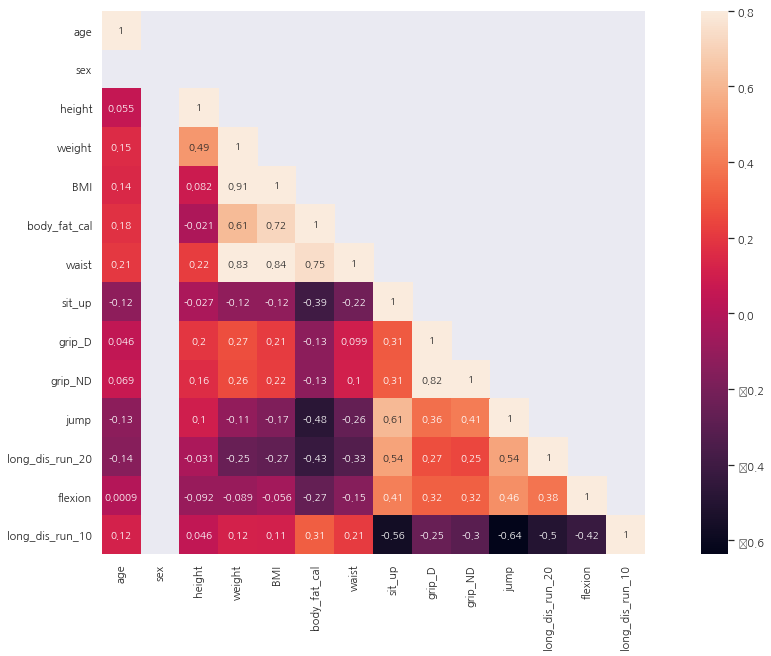

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask ,vmax = .8 ,square = True , annot = True)

sit_up 줄을 보면 신체조건만 따져봤을 때 , 윗몸일으키기와 가장 큰 상관관계가 있는 것은 체지방량, 다음으로 허리치수임을 알 수 있습니다. 

### 2.C 데이터 시각화
### 윗몸일으키기와 신체조건 관련성


# 수정 4: 이것 또한 신체조건에 따른 윗몸일으키기의 개수를 보는 것이 더 적절하다고 판단하여 신체조건을 x , 윗몸일으키기의 개수가 y에 오도록 하였습니다. 
# 또한 윗몸일으키기와 각 신체조건과의 상관관계를 한눈에 들어오도록 시각화하고싶어 사진을 편집하여 이미지를 불러왔었는데, subplot을 사용하면 된다는 것을 알게되어 수정하였습니다. 

# 그리고 이 데이터는 순위와 관련있는 데이터가 아니기 때문에 상관계수로써  pearson만 사용하면 된다고 판단하여 pearson만 구하였습니다. 

# Before

##### 윗몸일으키기 - 키 

[-0.026830814996137507, 0.5630149814930303]
[-0.034339109674230865, 0.4591155202754338]


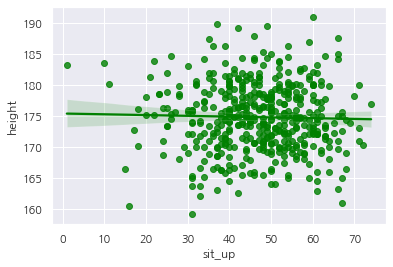

In [22]:
#피어슨//스피어맨 상관계수 1) 키와 윗몸일으키기
sns.regplot(data = data_twenty_M, x = 'sit_up', y = 'height', color = 'green')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.height)
print([R1, p1]) 
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up, data_twenty_M.height)
print([R2, p2])

##### 윗몸일으키기 - 몸무게

[-0.11636647660211027, 0.011852148956445005]
[-0.051350780096913524, 0.26809658913239226]


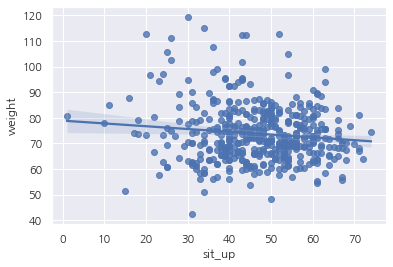

In [23]:
#피어슨//스피어맨 상관계수 2) 몸무게와 윗몸일으키기
sns.regplot(data = data_twenty_M, x = 'sit_up', y = 'weight')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.weight)
print([R1, p1]) 
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up, data_twenty_M.weight)
print([R2, p2]) 

##### 윗몸일으키기 - BMI

[-0.11791853613997318, 0.010762558311401979]
[-0.047585907278153254, 0.30481351114611865]


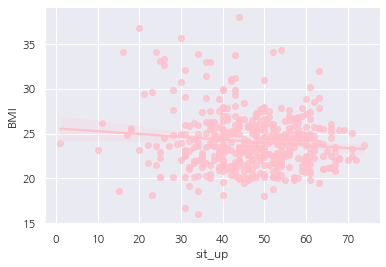

In [24]:
#피어슨//스피어맨 상관계수 3) BMI와 윗몸일으키기
sns.regplot(data = data_twenty_M, x = 'sit_up', y = 'BMI',color = 'pink')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.BMI)
print([R1, p1]) 
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up, data_twenty_M.BMI)
print([R2, p2])

##### 윗몸일으키기 - 체지방률

[-0.39344550027601705, 9.689805699868976e-19]
[-0.39836579849506043, 3.269976391992729e-19]


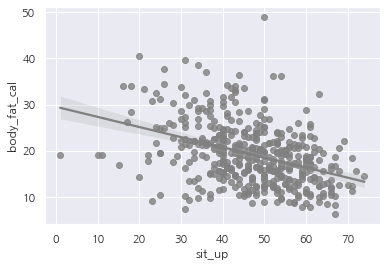

In [25]:
#피어슨//스피어맨 상관계수 4) body_fat_cal와 윗몸일으키기
sns.regplot(data = data_twenty_M, x = 'sit_up', y = 'body_fat_cal',color = 'grey')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.body_fat_cal)
print([R1, p1]) 
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up, data_twenty_M.body_fat_cal)
print([R2, p2]) 

##### 윗몸일으키기 - 허리둘레

[-0.22154961976631382, 1.3307065013463964e-06]
[-0.16787387315518756, 0.00026848057073869933]


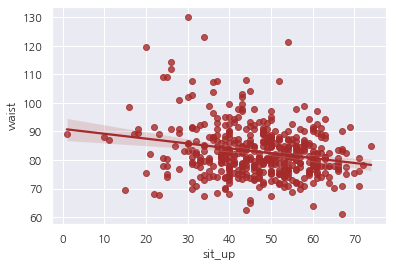

In [26]:
#피어슨//스피어맨 상관계수 5) waist 와 윗몸일으키기
sns.regplot(data = data_twenty_M, x = 'sit_up', y = 'waist',color = 'brown')
[R1, p1] = stats.pearsonr(data_twenty_M.sit_up, data_twenty_M.waist)
print([R1, p1]) 
[R2, p2] = stats.spearmanr(data_twenty_M.sit_up, data_twenty_M.waist)
print([R2, p2]) 

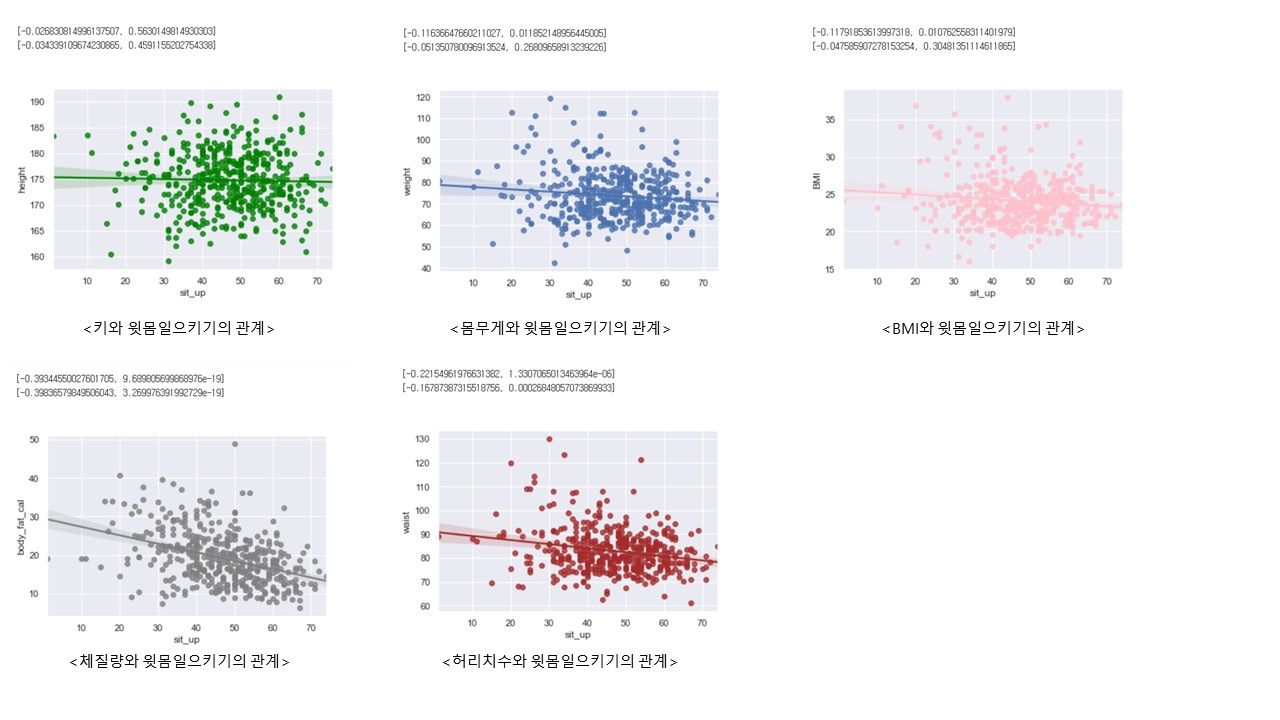

In [27]:
Image("그림3.jpg")

# After

[Text(0, 0.5, '윗몸일으키기'), Text(0.5, 1.0, '허리둘레 - 윗몸일으키기')]

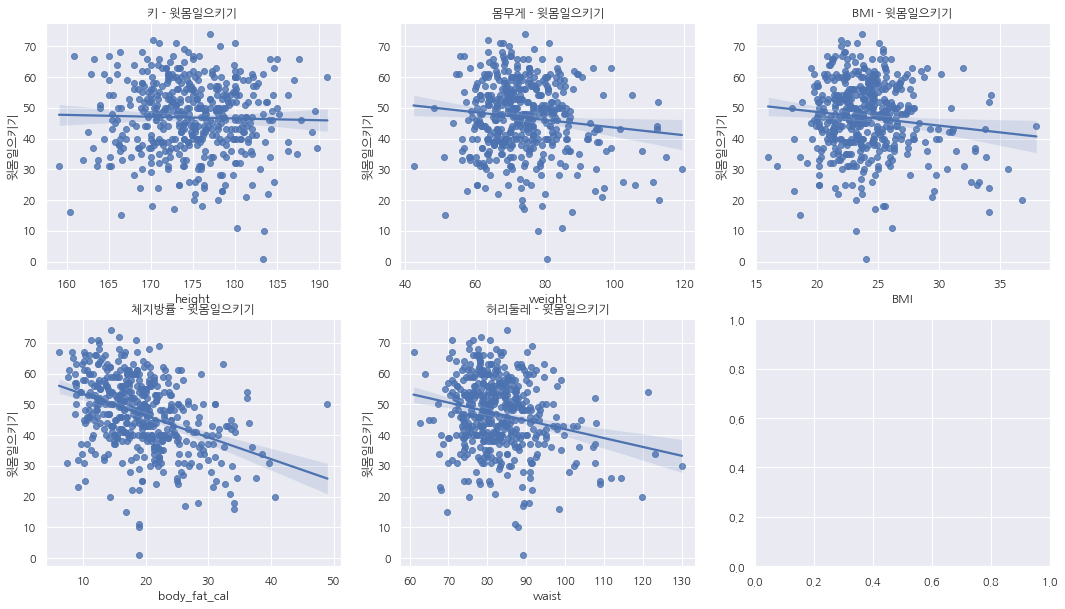

In [28]:
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.regplot(data =data_twenty_M  , x = "height" , y = "sit_up" , ax = ax1)
sns.regplot(data = data_twenty_M, x = "weight" , y = "sit_up" , ax = ax2)
sns.regplot(data = data_twenty_M , x = "BMI" , y = "sit_up" , ax = ax3)
sns.regplot(data = data_twenty_M , x = "body_fat_cal" , y = "sit_up" , ax = ax4)
sns.regplot(data = data_twenty_M , x = "waist" , y = "sit_up" , ax = ax5)
ax1.set(ylabel = '윗몸일으키기' , title = "키 - 윗몸일으키기 ")
ax2.set(ylabel = '윗몸일으키기' , title = "몸무게 - 윗몸일으키기")
ax3.set(ylabel = '윗몸일으키기' , title = "BMI - 윗몸일으키기")
ax4.set(ylabel = '윗몸일으키기' , title = "체지방률 - 윗몸일으키기")
ax5.set(ylabel = '윗몸일으키기' , title = "허리둘레 - 윗몸일으키기")

In [29]:
[R1, p1] = stats.pearsonr(data_twenty_M.height, data_twenty_M.sit_up)
print("키-윗몸일으키기:" + str([R1, p1]))
[R1, p1] = stats.pearsonr(data_twenty_M.weight, data_twenty_M.sit_up)
print("몸무게-윗몸일으키기:" + str([R1, p1]))
[R1, p1] = stats.pearsonr(data_twenty_M.BMI, data_twenty_M.sit_up)
print("BMI-윗몸일으키기:" + str([R1, p1]))
[R1, p1] = stats.pearsonr(data_twenty_M.body_fat_cal, data_twenty_M.sit_up)
print("체지방률-윗몸일으키기:" + str([R1, p1]))
[R1, p1] = stats.pearsonr(data_twenty_M.waist, data_twenty_M.sit_up)
print("허리둘레-윗몸일으키기:" + str([R1, p1]))


키-윗몸일으키기:[-0.026830814996137507, 0.5630149814930303]
몸무게-윗몸일으키기:[-0.11636647660211027, 0.011852148956445005]
BMI-윗몸일으키기:[-0.11791853613997318, 0.010762558311401979]
체지방률-윗몸일으키기:[-0.39344550027601705, 9.689805699868976e-19]
허리둘레-윗몸일으키기:[-0.22154961976631382, 1.3307065013463964e-06]


신체조건과 윗몸일으키기의 상관관계를 한눈에 봤을 때도 체지방률과 허리둘레가 다른 신체조건에 비해  큰 상관관계가 있음을 알 수 있습니다. 체지방률과 허리둘레의 p값 또한 매우 작아 유의한 값임을 알 수 있습니다. 

## solution 2

## 윗몸 일으키기와 상관관계가 가장 깊은 신체조건 1순위 체지방률, 2순위 허리 수치 입니다 
## 윗몸 일으키기를 더 잘하고싶으면 체지방률을 낮추고, 허리수치를 줄이려고 노력하세요 !

# ------------------------------------------------------------------------------------------------------

# 상황 2

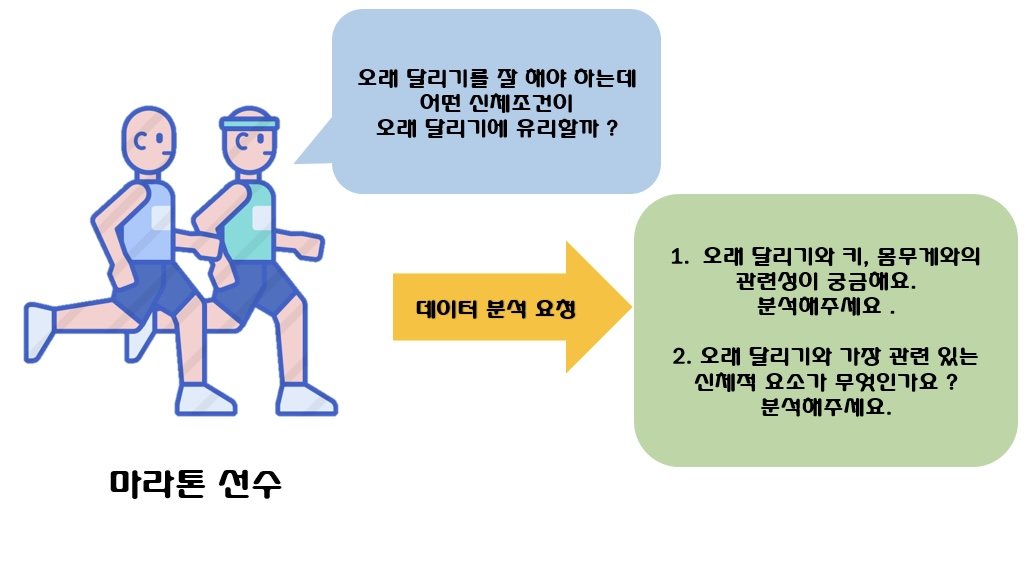

In [30]:
Image("그림2.jpg")

## .........................................................................
## TO DO LIST
##  업무 1. 오래달리기 - 키와의 상관관계 파악
## 업무 2. 오래달리기 - 몸무게와의 상관관계 파악
## .........................................................................

##  업무 1. 오래달리기 - 키와의 상관관계 파악

### 1.A 데이터 불러오기 및 살펴보기 

In [31]:
data = pd.read_csv('2017국민체력실태조사_ 통합 raw data.csv',encoding='cp949')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4292 non-null   int64  
 1   Unnamed: 1   4292 non-null   int64  
 2   지역           4292 non-null   int64  
 3   연령(만)        4292 non-null   int64  
 4   성별           4292 non-null   int64  
 5   성명           0 non-null      float64
 6   신장           4292 non-null   float64
 7   체중           4292 non-null   float64
 8   BMI          4292 non-null   float64
 9   체지방률         4292 non-null   float64
 10  허리둘레         4292 non-null   float64
 11  윗몸일으키기       4292 non-null   int64  
 12  악력(D)        4292 non-null   float64
 13  악력(ND)       4292 non-null   float64
 14  제자리멀리뛰기      4292 non-null   int64  
 15  20m 왕복오래달리기  4292 non-null   int64  
 16  좌전굴          4292 non-null   float64
 17  10m 왕복달리기    4292 non-null   float64
 18  연령집단         4292 non-null   int64  
dtypes: flo

data column 정보 


성별 1 : 남 / 2: 여 


연령집단 (19세부터 64세까지 9단계로 나누어져있다) 

### 1.B 데이터 전처리 

#### 결측치 확인 및 보정 (위와 동일한 방식으로 전처리 과정을 거쳤다. )

#### 현역 마라톤 선수들의 평균 나이를 고려해 재분류

In [32]:
age_map = {
    '10대':'마라톤현역가능',
    '20대': '마라톤현역가능',
    '30대':'마라톤현역가능',
    '40대':'마라톤현역불가능',
    '50대':'마라톤현역불가능','60대':'마라톤현역불가능'}
age_map

{'10대': '마라톤현역가능',
 '20대': '마라톤현역가능',
 '30대': '마라톤현역가능',
 '40대': '마라톤현역불가능',
 '50대': '마라톤현역불가능',
 '60대': '마라톤현역불가능'}

In [33]:
data1['age_group2'] = data1['age_group'].map(age_map)
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대,하위권,마라톤현역불가능
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대,하위권,마라톤현역불가능
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대,하위권,마라톤현역불가능
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대,하위권,마라톤현역불가능


#### 남자/여자 현역가능(10대 ~ 30대)  데이터 추출

In [34]:
data_acti = data1[data1.age_group2 == '마라톤현역가능'] 
data_acti_M = data_acti[data_acti.sex == 1 ]
data_acti_F = data_acti[data_acti.sex == 2]
data_acti_M

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,38,1,165.9,71.5,26.0,23.2,92.5,35,42.6,41.0,211,24,11.9,10.65,30대,하위권,마라톤현역가능
4194,38,1,165.9,71.5,26.0,22.2,86.9,35,42.6,41.0,211,24,11.9,10.65,30대,하위권,마라톤현역가능
4195,38,1,158.7,59.7,23.7,20.3,77.8,44,45.9,43.3,223,41,23.0,10.20,30대,중위권,마라톤현역가능
4196,38,1,177.2,81.3,25.9,27.1,93.9,36,50.6,49.3,213,27,14.7,11.47,30대,하위권,마라톤현역가능


# 수정 5 : 신체조건에 따른 오래달리기의 상관관계를 보는 것이 더 적절하다고 판단하여 신체조건을 x축, 오래달리기를 y축으로 수정하였습니다. 

# Before

##  업무 1. 오래달리기 - 키와의 상관관계 파악

##### 왕복오래달리기 - 키(여자집단)

[0.03392132926472853, 0.287280480929943]
[0.03153686569572619, 0.32253224103911826]


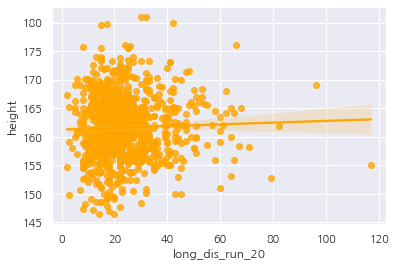

In [35]:
#현역가능나이의 여자 키와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'long_dis_run_20', y = 'height',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.height)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_F.long_dis_run_20, data_acti_F.height)
print([R2, p2])

여자집단에서 p<0.5이므로 유의하긴 하지만 상관관계가 크지 않다.

##### 왕복오래달리기 - 키(남자집단)

[0.017055675052192434, 0.5927061338477605]
[0.015824884434691218, 0.6196741589511248]


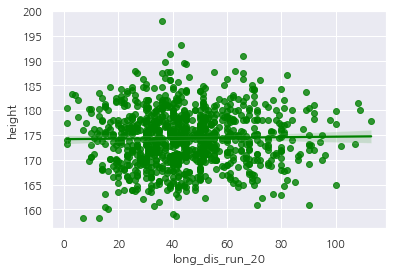

In [36]:
#현역가능나이의 남자 키와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'long_dis_run_20', y = 'height',color = 'green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.height)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_M.long_dis_run_20, data_acti_M.height)
print([R2, p2])

남자집단에서 p>0.5이므로 유의한 상관관계를 가지지 않는다

 => 키와 왕복오래달리기에는 큰 상관관계가 없다 

# After 

[0.03392132926472853, 0.287280480929943]


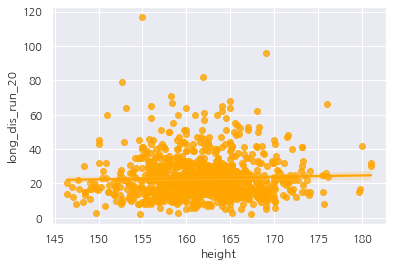

In [37]:
#현역가능나이의 여자 키와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'height', y = 'long_dis_run_20',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.height)
print([R1, p1])

[0.017055675052192434, 0.5927061338477605]


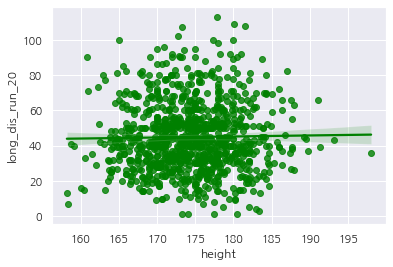

In [38]:
#현역가능나이의 남자 키와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'height', y = 'long_dis_run_20',color = 'green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.height)
print([R1, p1])

키와 오래달리기에서는 p값이 0.05보다 크므로 유의한 값이 아니다 

# -----------------------------------------------------------------------------------------------

# Before

## 업무 2. 오래달리기 - 몸무게와의 상관관계 파악

##### 왕복오래달리기 - 몸무게 (여자집단)

[-0.1708825199180939, 6.709932037496106e-08]
[-0.1818066188011526, 8.94635130263629e-09]


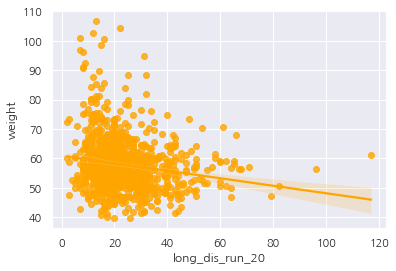

In [39]:
#여자집단의 몸무게와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'long_dis_run_20', y = 'weight',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.weight)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_F.long_dis_run_20, data_acti_F.weight)
print([R2, p2])

여자집단에서 오래달리기와 몸무게는 음의 상관관계를 가지고(몸무게가 늘수록 오래달리기잘 못함), p<0.5이고 매우 작으므로 매우 유의미한 관계를 가진다.

##### 왕복오래달리기 - 몸무게 (남자집단)

[-0.2410333506412673, 1.6881420551780848e-14]
[-0.22297894582938507, 1.4193584328476915e-12]


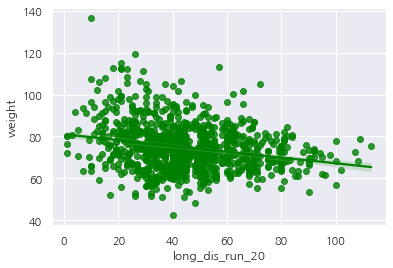

In [40]:
#남자집단의 몸무게와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'long_dis_run_20', y = 'weight',color = 'green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.weight)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_M.long_dis_run_20, data_acti_M.weight)
print([R2, p2])

남자 집단에서도 오래달리기와 몸무게는
음의 상관관계를 가지고(몸무게가 늘수록 오래달리기잘 못함), p<0.5이고 매우 작으므로
매우 유의미한 관계를 가진다.(남자집단이 영향 더 잘받음)

=> 몸무게와 왕복오래달리기는 상관관계가 음의 상관관계를 가지고 있다 

# After

[-0.1708825199180939, 6.709932037496106e-08]


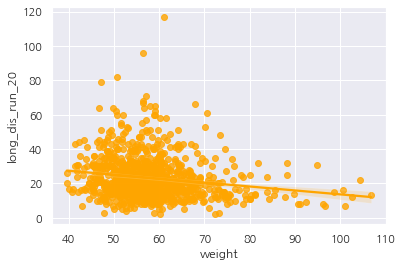

In [41]:
#여자집단의 몸무게와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'weight', y = 'long_dis_run_20',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.weight)
print([R1, p1])

[-0.2410333506412673, 1.6881420551780848e-14]


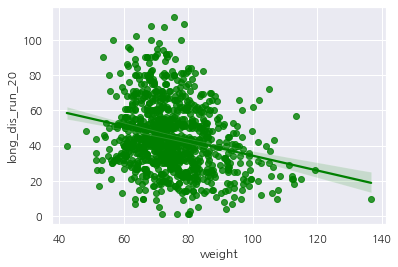

In [42]:
#남자집단의 몸무게와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'weight', y = 'long_dis_run_20',color = 'green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.weight)
print([R1, p1])

# 수정 6 : 또한 키와 각 신체조건과의 상관관계를 한눈에 들어오도록 시각화하고싶어 사진을 편집하여 이미지를 불러왔었는데, subplot을 사용하면 된다는 것을 알게되어 수정하였습니다

# Before

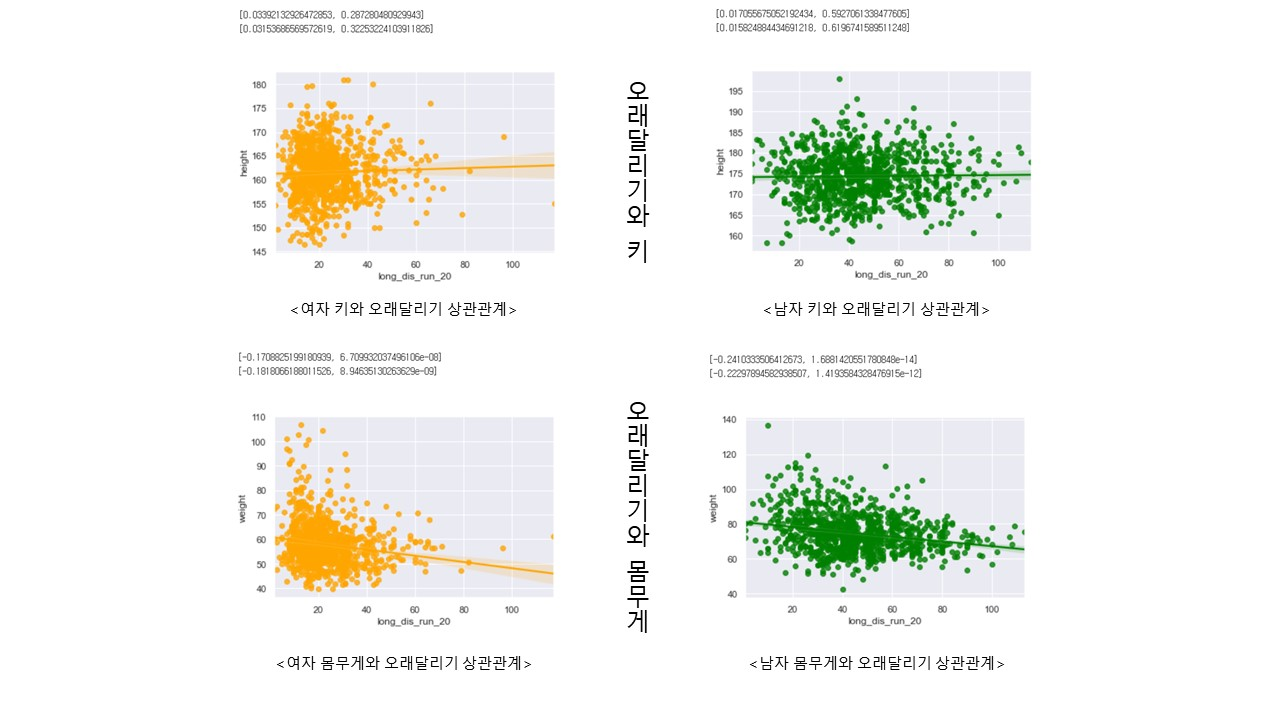

In [43]:
Image("그림4.jpg")

# After

[Text(0, 0.5, '오래달리기'), Text(0.5, 1.0, '몸무게 - 오래달리기(남성)')]

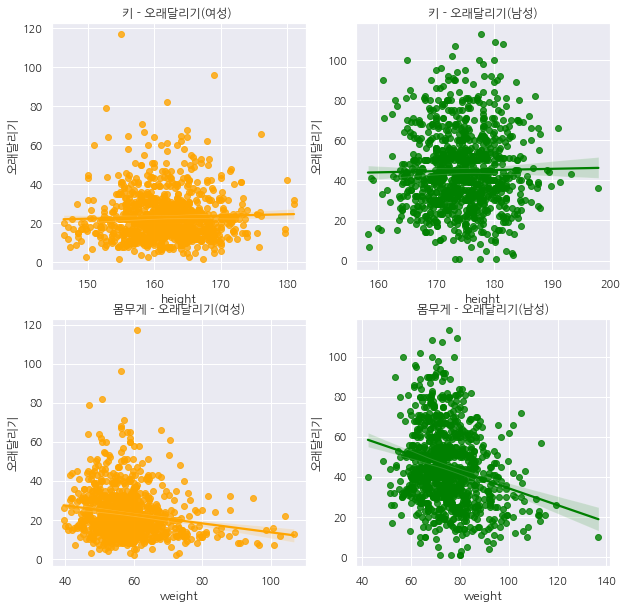

In [44]:
figure, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(10,10)

sns.regplot(data = data_acti_F  , x = "height" , y = "long_dis_run_20" , ax = ax1,color = 'orange' )
sns.regplot(data =  data_acti_M, x = "height" , y = "long_dis_run_20" , ax = ax2,color = 'green')
sns.regplot(data =  data_acti_F , x = "weight" , y = "long_dis_run_20" , ax = ax3,color = 'orange')
sns.regplot(data =  data_acti_M , x = "weight" , y = "long_dis_run_20" , ax = ax4,color = 'green')

ax1.set(ylabel = '오래달리기' , title = "키 - 오래달리기(여성) ")
ax2.set(ylabel = '오래달리기' , title = "키 - 오래달리기(남성)")
ax3.set(ylabel = '오래달리기' , title = "몸무게 - 오래달리기(여성)")
ax4.set(ylabel = '오래달리기' , title = "몸무게 - 오래달리기(남성)")

## solution 1 키와 왕복오래달리기는 큰 상관관계가 없으니까 키가 작아도 용기를 가지세요 !

## solution 2 몸무게와 왕복오래달리기는 상관관계가 있으니 왕복오래달리기를 잘 하려면 다이어트를 하시는게 어떨까요 ? 

# ---------------------------------------------------------------------------------------------

# 수정 7 : 윗몸 일으키기와 상관관계가 가장 깊은 신체조건을 알아보기 위해 corrwith를 사용하였는데 heatmap으로 봐도 좋을 것 같아서 추가하였습니다. 

## 업무 3.오래달리기와 상관관계가 가장 깊은 신체조건

###### 여자집단에서 오래달리기와 가장 상관관계가 깊은 신체조건이 무엇일까 ? 

In [45]:
data_acti.corrwith(data_acti_F.long_dis_run_20)

age               -0.171711
sex                     NaN
height             0.033921
weight            -0.170883
BMI               -0.202067
body_fat_cal      -0.392622
waist             -0.251897
sit_up             0.581246
grip_D             0.304666
grip_ND            0.330951
jump               0.537095
long_dis_run_20    1.000000
flexion            0.315331
long_dis_run_10   -0.574673
dtype: float64

# Add 

In [46]:
corr = data_acti_F[['age', 'sex', 'height', 'weight', 'BMI', 'body_fat_cal', 'waist',
       'sit_up', 'grip_D', 'grip_ND', 'jump', 'long_dis_run_20', 'flexion',
       'long_dis_run_10', 'age_group', 'sit_up_group']] 
corr = corr.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


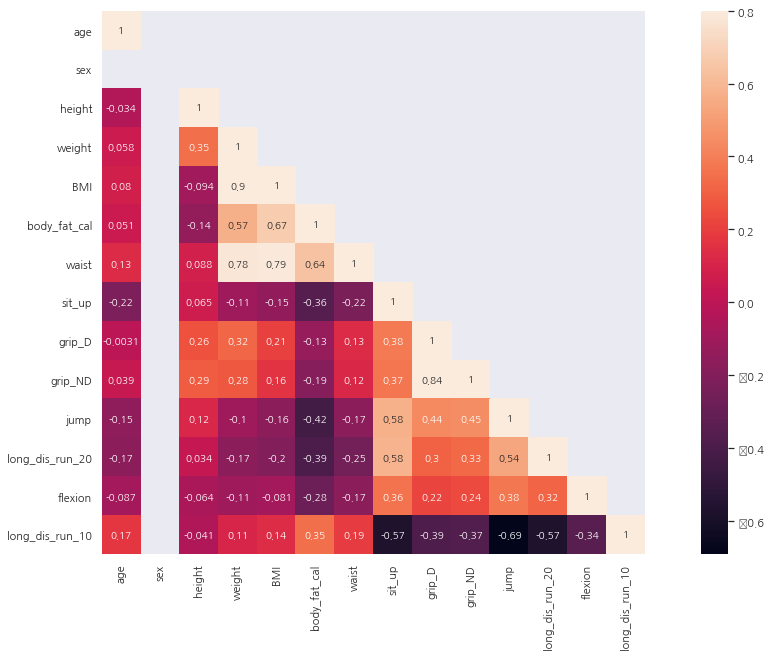

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask ,vmax = .8 ,square = True , annot = True)

long_dis_run_20을 보면 가장 상관관계가 깊은 신체조건은 체지방률임을 알 수 있습니다. 

# 수정 8 : 이것 또한 체지방률에 따른 오래달리기를 파악하기위해 x축을 체지방률 y축을 오래달리기로 바꾸는 것이 더 적절하다고 판단하여 수정하였습니다. 

# Before

##### 왕복오래달리기 - 체지방률 ( 여자집단 )

[-0.39262202877656127, 1.0883875436484477e-37]
[-0.44469561828810306, 4.728994034570005e-49]


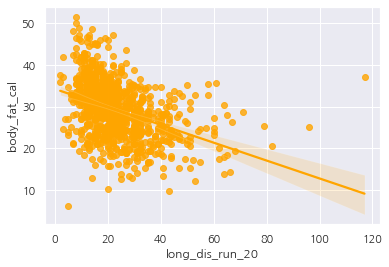

In [48]:
#여자집단에서 체지방률와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'long_dis_run_20', y = 'body_fat_cal',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.body_fat_cal)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_F.long_dis_run_20, data_acti_F.body_fat_cal)
print([R2, p2])

# After

[-0.39262202877656127, 1.0883875436484477e-37]
[-0.44469561828810306, 4.728994034570005e-49]


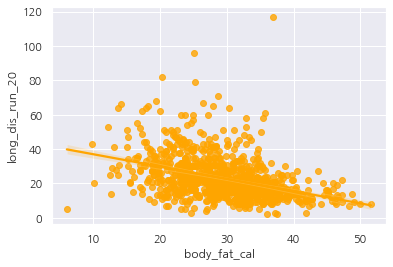

In [49]:
#여자집단에서 체지방률와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_F, x = 'body_fat_cal', y = 'long_dis_run_20',color = 'orange')
[R1, p1] = stats.pearsonr(data_acti_F.long_dis_run_20, data_acti_F.body_fat_cal)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_F.long_dis_run_20, data_acti_F.body_fat_cal)
print([R2, p2])

여자집단에서 체지방률은 오래달리기와 매우 큰 상관관계를 가진다.

# 수정 7,8 과 같은 방법으로 수정 

# Before

###### 남자집단에서 오래달리기와 가장 상관관계가 깊은 신체조건이 무엇일까 ? 

In [50]:
data_acti.corrwith(data_acti_M.long_dis_run_20)

age               -0.225775
sex                     NaN
height             0.017056
weight            -0.241033
BMI               -0.283893
body_fat_cal      -0.462222
waist             -0.352990
sit_up             0.573775
grip_D             0.244699
grip_ND            0.232098
jump               0.530216
long_dis_run_20    1.000000
flexion            0.380023
long_dis_run_10   -0.498561
dtype: float64

# Add

In [51]:
corr = data_acti_M[['age', 'sex', 'height', 'weight', 'BMI', 'body_fat_cal', 'waist',
       'sit_up', 'grip_D', 'grip_ND', 'jump', 'long_dis_run_20', 'flexion',
       'long_dis_run_10', 'age_group', 'sit_up_group']] 
corr = corr.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


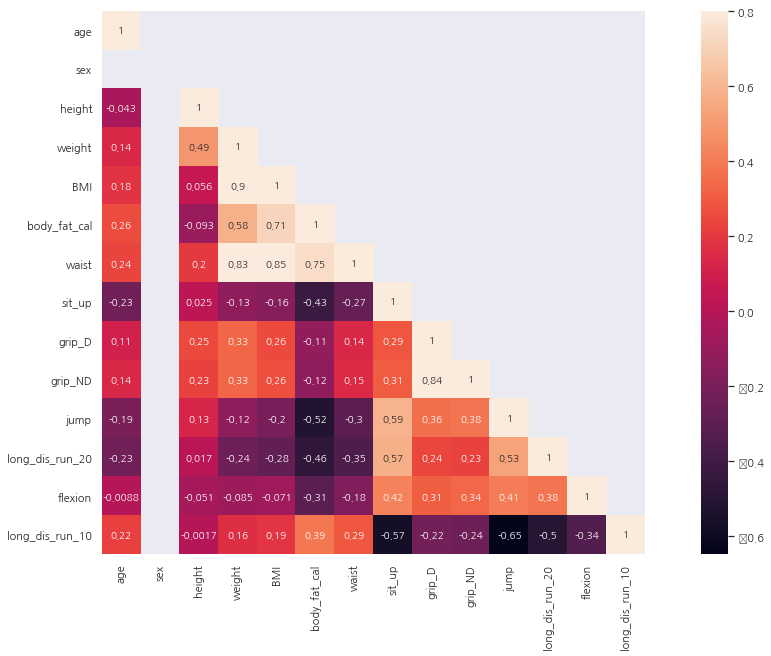

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask ,vmax = .8 ,square = True , annot = True)

# Before

##### 왕복오래달리기 - 체지방률 ( 남자집단 )

[-0.4622224569368513, 2.4099166174144507e-53]
[-0.47205891661083227, 7.261957828546004e-56]


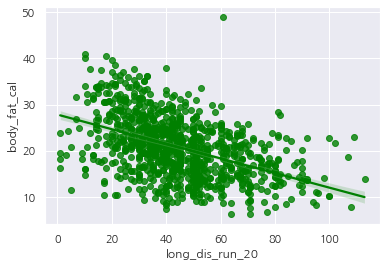

In [53]:
#남자집단에서 체지방률와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'long_dis_run_20', y = 'body_fat_cal',color ='green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.body_fat_cal)
print([R1, p1])
[R2, p2] = stats.spearmanr(data_acti_M.long_dis_run_20, data_acti_M.body_fat_cal)
print([R2, p2])

# After

[-0.4622224569368513, 2.4099166174144507e-53]


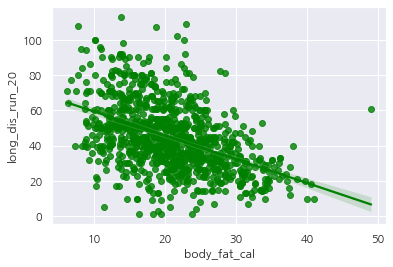

In [54]:
#남자집단에서 체지방률와 왕복오래달리기 
import scipy.stats as stats 
sns.regplot(data = data_acti_M, x = 'body_fat_cal', y = 'long_dis_run_20',color ='green')
[R1, p1] = stats.pearsonr(data_acti_M.long_dis_run_20, data_acti_M.body_fat_cal)
print([R1, p1])

음의 상관관계가 있고 남성 역시도 체지방률이 가장 큰 상관관계를 가진다.

## solution 3 하지만 왕복오래달리기와 가장 상관관계가 높은 것은 체지방률입니다 ! 체지방률을 줄이기 위해 식이요법과 적절한 운동을 하는 것을 추천합니다 !

# ----------------------------------------------------------------------------------------------------

# 수정 (Add)

In [110]:
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2,hander,right_ratio,left_ratio
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능,오른손잡이,1,0
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능,오른손잡이,1,0
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능,오른손잡이,1,0
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능,오른손잡이,1,0
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능,왼손잡이,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대,하위권,마라톤현역불가능,오른손잡이,1,0


## 데이터의 악력 column을 보고 일반적으로 오른손잡이들은 오른손 악력이 더 세고, 왼손잡이들은 왼손 악력이 더 셀 것이라는 가정하에 오른손잡이와 왼손잡이의 비율을 알 수 있을 것이라 생각하여 구해보았다. 

In [55]:
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대,하위권,마라톤현역불가능
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대,하위권,마라톤현역불가능
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대,하위권,마라톤현역불가능
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대,하위권,마라톤현역불가능


In [56]:
condition_list = [(data1.grip_D >data1. grip_ND), 
                (data1.grip_ND >data1. grip_D) ]
choice_list = [ '오른손잡이' , '왼손잡이' ]

In [57]:
data1['hander'] = np.select(condition_list, choice_list, default = 'NaN')
data1.head()

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2,hander
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능,오른손잡이
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능,오른손잡이
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능,오른손잡이
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능,오른손잡이
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능,왼손잡이


In [58]:
data1['right_ratio'] = np.where((data1['hander'] == '오른손잡이'),1,0)
data1['left_ratio'] = np.where((data1['hander'] == '왼손잡이'),1,0)
print(data1.right_ratio.mean() *100  ,data1.left_ratio.mean()* 100)

77.84249767008387 20.96924510717614


국민체력실태조사한 사람들 중에서 오른손잡이의 비율이 78 % 왼손잡이의 비율이 21% 정도임을 알 수 있다. 

# 수정 (Add)

## 악력에 대해 알아보니 , 여자 평균 악력과 남자 평균악력에 대해 알아보고 싶어졌다. 
## 여기서 조건을 같게 하기 위해서 많은 비율을 차지하고 있는 오른손잡이들의 오른손 악력의 평균을 추정해보기로 하였다. 

In [81]:
right = data1[data1.hander == '오른손잡이']

In [164]:
#오른손잡이 중 남성과 여성 표본을 뽑는다. 
right_man =right[ right['sex'] == 1 ]
right_M = right_man['grip_D']
right_woman = right [right['sex'] == 2]
right_F = right_woman['grip_D']
data2 = pd.concat([right_man, right_woman])

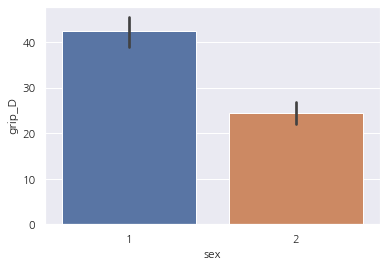

In [83]:
sns.barplot(data = data2, x='sex', y='grip_D') #범주형 - 수치형 데이터 시각화 

In [86]:
# 95 % 신뢰구간을 t분포에 의해 계산 
group_mean = data2.groupby('sex')['grip_D'].mean() #표본평균
group_SEM = data2.groupby('sex')['grip_D'].std(ddof=1) / np.sqrt(20) #표본표준오차
print(group_mean, group_SEM)

interval_m = stats.t.interval(alpha = 0.95, df = 19, loc =42.415 , scale = 1.739121) #95 % 신뢰구간 (남)
interval_f = stats.t.interval(alpha = 0.95, df = 19, loc = 24.425, scale =  1.302849) #95 % 신뢰구간 (여)
print(interval_m, interval_f)

sex
1    42.415
2    24.425
Name: grip_D, dtype: float64 sex
1    1.739121
2    1.302849
Name: grip_D, dtype: float64
(38.77497791347345, 46.05502208652655) (21.69810570373825, 27.15189429626175)


In [98]:
#독립표본 t - test (남, 여 두집단의 평균 차이를 알아보는 것이기에 독립표본을 사용해야함)
[T_independent, p_independent] = stats.ttest_ind(right_man['grip_D'],right_woman['grip_D'], equal_var = False)
print(T_independent, p_independent)

8.278854105117823 8.842865621890102e-10


독립표본 t - test를 했을 때 p 값이 0.05보다 작게 나왔으므로 두 집단의 평균이 같다고 할 수 없다. 

In [165]:
# 표본평균의 평균 구하기 = 모평균
sample_mean_array_M = np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
    sample = np.random.choice(right_M,size = 100)
    sample_mean_array_M[i] = np.mean(sample)
#남성집단의 모평균 추정
np.mean(sample_mean_array_M)

43.6014368

In [166]:
 sample_mean_array_F = np.zeros(10000)
np.random.seed(1)
for i in range(0,10000):
    sample = np.random.choice (right_F,size = 100)
    sample_mean_array_F[i] = np.mean(sample)
#여성집단의 모평균 추정
np.mean(sample_mean_array_F)

25.9227742

# 수정 (Add) : 체력검정간의 상관관계 알아보기 (수치형 - 수치형)

In [99]:
data1

,age,sex,height,weight,BMI,body_fat_cal,waist,sit_up,grip_D,grip_ND,jump,long_dis_run_20,flexion,long_dis_run_10,age_group,sit_up_group,age_group2,hander,right_ratio,left_ratio
0,19,1,178.3,100.2,31.5,23.3,99.1,47,56.7,54.0,192,62,8.7,10.45,10대,중위권,마라톤현역가능,오른손잡이,1,0
1,19,1,167.9,52.9,18.8,11.7,69.5,38,27.1,26.5,224,26,3.7,11.68,10대,하위권,마라톤현역가능,오른손잡이,1,0
2,19,1,172.7,59.8,20.1,8.9,71.2,39,38.2,35.7,207,54,-9.5,9.90,10대,하위권,마라톤현역가능,오른손잡이,1,0
3,19,1,175.5,73.6,23.9,18.3,83.0,50,40.2,37.4,234,50,15.2,9.77,10대,중위권,마라톤현역가능,오른손잡이,1,0
4,19,1,172.6,57.7,19.4,17.1,73.0,28,37.3,37.5,179,34,-11.2,12.10,10대,하위권,마라톤현역가능,왼손잡이,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,62,2,152.3,67.0,28.9,41.2,86.6,22,23.5,21.7,84,10,9.0,16.14,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4288,62,2,163.5,54.4,20.3,25.3,73.5,1,27.7,24.1,76,8,13.9,17.30,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4289,63,2,150.4,70.8,31.3,41.3,97.5,0,26.1,24.1,86,6,15.5,16.20,60대,하위권,마라톤현역불가능,오른손잡이,1,0
4290,64,1,170.0,89.0,30.8,28.3,97.1,15,42.7,41.6,164,15,10.8,14.50,60대,하위권,마라톤현역불가능,오른손잡이,1,0


In [102]:
corr = data1[['age', 'sex', 'height', 'weight', 'BMI', 'body_fat_cal', 'waist',
       'sit_up', 'grip_D', 'grip_ND', 'jump', 'long_dis_run_20', 'flexion',
       'long_dis_run_10', 'age_group', 'sit_up_group']] 
corr = corr.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


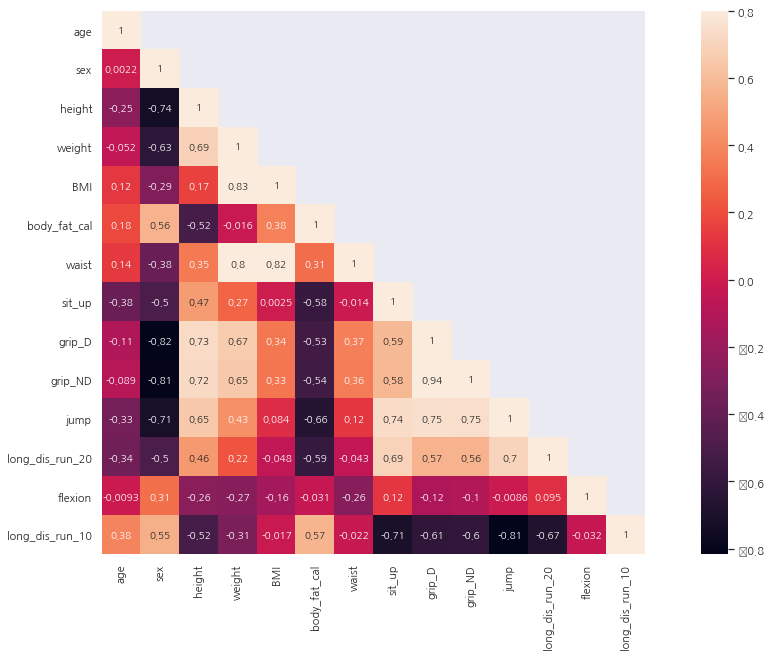

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask ,vmax = .8 ,square = True , annot = True)

In [115]:
#악력은 제자리 멀리뛰기 (왼,오 둘 다)
#오래달리기20는 제자리 멀리뛰기와 양의 상관관계
#오래달리기10은 제자리 멀리뛰기와 음의 상관관계
#유연성은 몸무게와 음의 상관관계

[0.7527180436564174, 0.0]
[0.7761750595327266, 0.0]


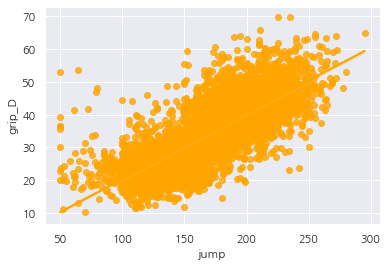

In [116]:
#악력은 제자리 멀리뛰기 (왼,오 둘 다)
sns.regplot(data = data1, x = 'jump', y = 'grip_D',color = 'orange')
[R1, p1] = stats.pearsonr(data1.jump,data1.grip_D)
print([R1, p1])
[R2, p2] = stats.spearmanr(data1.jump,data1.grip_D)
print([R2, p2])

[0.7008418888697883, 0.0]
[0.7230078228382198, 0.0]


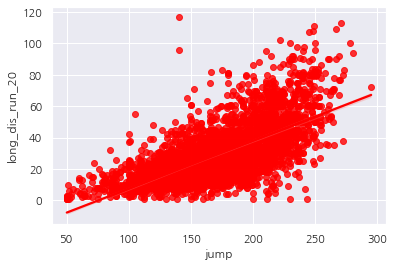

In [117]:
#오래달리기20는 제자리 멀리뛰기와 양의 상관관계
sns.regplot(data = data1, x = 'jump', y = 'long_dis_run_20',color = 'red')
[R1, p1] = stats.pearsonr(data1.jump,data1.long_dis_run_20)
print([R1, p1])
[R2, p2] = stats.spearmanr(data1.jump,data1.long_dis_run_20)
print([R2, p2])

[-0.8122457556624876, 0.0]
[-0.8447401077639831, 0.0]


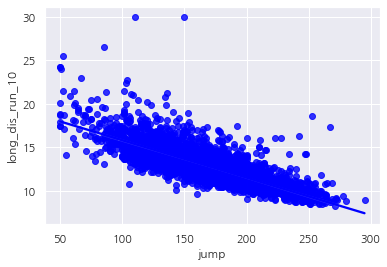

In [119]:
#오래달리기10은 제자리 멀리뛰기와 음의 상관관계
sns.regplot(data = data1, x = 'jump', y = 'long_dis_run_10',color = 'blue')
[R1, p1] = stats.pearsonr(data1.jump,data1.long_dis_run_10)
print([R1, p1])
[R2, p2] = stats.spearmanr(data1.jump,data1.long_dis_run_10)
print([R2, p2])

[-0.2655095097888083, 3.630303353979126e-70]
[-0.2760981029531774, 5.993884384455852e-76]


C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


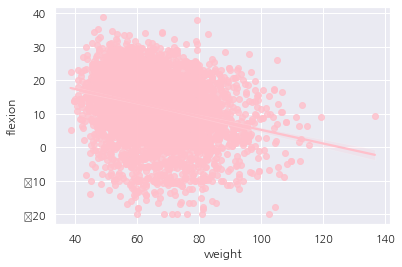

In [123]:
#유연성은 몸무게와 음의 상관관계
sns.regplot(data = data1, x = 'weight', y = 'flexion',color = 'pink')
[R1, p1] = stats.pearsonr(data1.weight,data1.flexion)
print([R1, p1])
[R2, p2] = stats.spearmanr(data1.weight,data1.flexion)
print([R2, p2])

# 수정 (Add)

# 제자리멀리뛰기와 가장 양의 상관관계가 높은 것은 ?

In [114]:
#제자리멀리뛰기와 가장 양의 상관관계가 높은 것은 ?
data1.corrwith(data1.jump)
#악력
#악력이 높을수록 제자리멀리뛰기를 정말 잘할까 궁금하여서 알아보았다.

age               -0.334482
sex               -0.711005
height             0.652029
weight             0.429352
BMI                0.084318
body_fat_cal      -0.659017
waist              0.122568
sit_up             0.736546
grip_D             0.752718
grip_ND            0.748628
jump               1.000000
long_dis_run_20    0.700842
flexion           -0.008571
long_dis_run_10   -0.812246
right_ratio       -0.012621
left_ratio         0.016541
dtype: float64

[0.7527180436564174, 0.0]


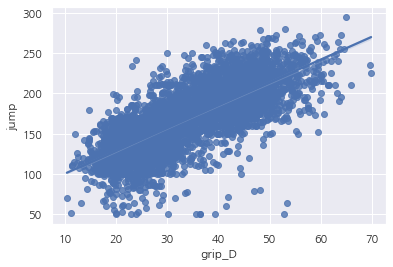

In [109]:
import scipy.stats as stats 
sns.regplot (data = data1 , x = 'grip_D' , y = 'jump')
[R1, p1] = stats.pearsonr(data1.grip_D, data1.jump)
print([R1, p1])
#오른손잡이가 많다는 점을 고려하여 오른손의 악력을 기준으로 하였고, 오른손의 악력이 강할수록 제자리멀리뛰기를 멀리뛴다는 
#양의 상관관계를 띄고있음을 알 수 있다.  p값 또한 0으로 이 상관관계는 유의함을 알 수 있다. 
#직관적으로 악력이 강할수록 제자리멀리뛰기를 잘 할것이라는 생각은 못해봤는데 이러한 결과가 나와서 신기하였다.
#이러한 결과가 나와서 신기하였다. 
#이러한 결과가 나온 이유에 대해서 조사를 해보니, 악력은 전신힘이라고 불릴정도로 우리 몸의 많은 부분과 상관이 있었다. 
#주먹을 세게 쥐면 팔꿈치까지의 근육 뿐만 아니라 팔꿈치 위의 이두, 삼두 심지어 어깨의 근육에 까지도 영향을 미친다는 것을 알 수 있었다. 
#그리고 제자리 멀리뛰기의 경우 팔 힘의 반동을 사용해야하기 때문에 악력과도 높은 상관관계를 띄는 것으로 예상된다. 

## 느낀 점  : 악력에 대해서 추가로 분석을 하다가 아래의 그림과 같은 기사를 보게 되었고, 이 기사가 정말일지 궁금해져서 분석해보고싶다.   

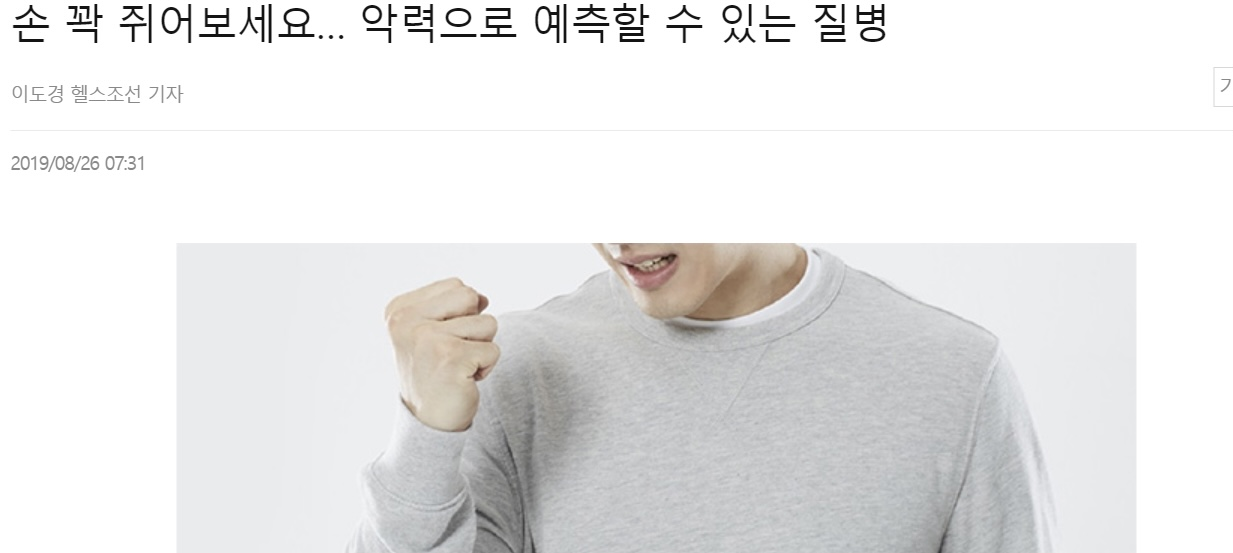

In [172]:
Image("그림5.jpg")

-도전해보고싶은 데이터 분석 주제가 많았는데, 생각보다 원하는 데이터를 찾는 것이 어려웠다. 

#### 프로젝트를 하면서 느낀점 

202055115 김예진 

1학년 때까지만 해도 데이터 사이언스의 중요성, 필요성에 대해서 잘 몰라서 프로그래밍 수업을 능동적으로 듣지 못한 것 같은데, 이번 데이터 분석 프로젝트를 진행하면서 우리가 직관적으로 궁금했던 점을 데이터 분석을 통해 통계적으로 알아낼 수 있음을 몸소 경험하며 흥미를 느꼈고, 또 이를 시각화하여 많은 사람에게 알리는 것에 내가 흥미가 있음을 깨달을 수 있어서 앞으로 더 능동적으로 데이터 사이언스 공부를 해보고 싶다는 생각이 들었다. 

202055117 김하민 : 

프로젝트를 진행하면서 여러번 주제를 바꿨고, 예측하던 결과가 나오지 않을 때도 많아서 좀 힘들었지만 자료를 보는 태도나 능력이 길러진 것 같아 뿌듯합니다.앞으로는 조금 더 공부하고 새로운 스토리를 구상하여 의미있는 분석을 해보고 싶습니다.